# Loading the files and libraries

In [1]:
import pandas as pd

# Path to your CSV file
file_path = 'movies/IMDb Movies India.csv'

# The CSV file might have a different encoding, so we use 'ISO-8859-1' if 'utf-8' fails
try:
    # Try loading with utf-8 encoding first
    data = pd.read_csv(file_path)
except UnicodeDecodeError:
    # If utf-8 encoding fails, use 'ISO-8859-1'
    data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataframe
print(data.head())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

# Calculate and plot the average movie ratings per year

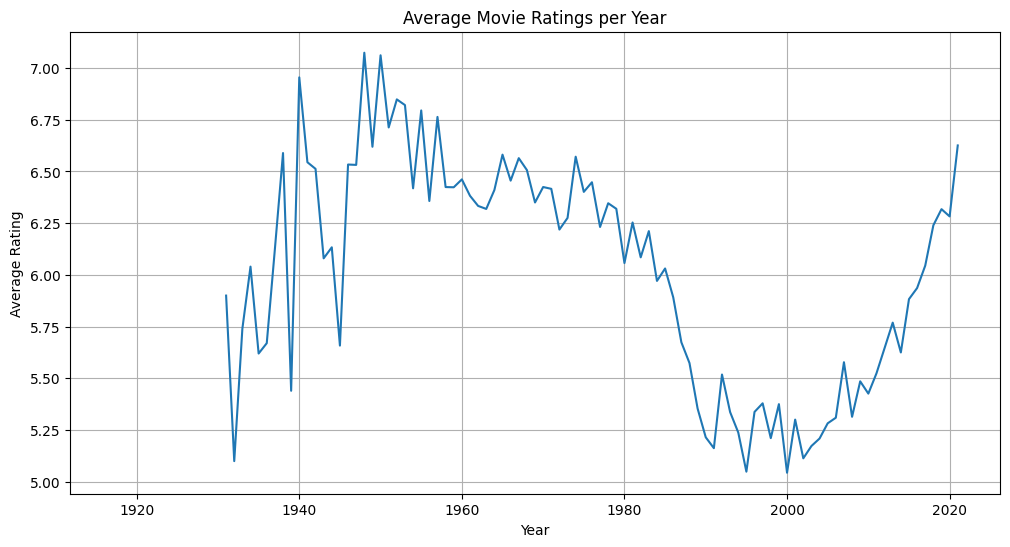

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV file
file_path = 'movies/IMDb Movies India.csv'

# Load the dataset with appropriate encoding
ratings = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert the 'Year' to a more usable format (removing parentheses)
ratings['Year'] = ratings['Year'].str.extract('(\d+)').astype(float)

# Convert 'Rating' to numeric
ratings['Rating'] = pd.to_numeric(ratings['Rating'], errors='coerce')

# Basic Analysis Example: Average rating per year
average_ratings_per_year = ratings.groupby('Year')['Rating'].mean()

# Plotting the results
plt.figure(figsize=(12, 6))
average_ratings_per_year.plot(kind='line')
plt.title('Average Movie Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


#  Genre-wise Analysis of Ratings

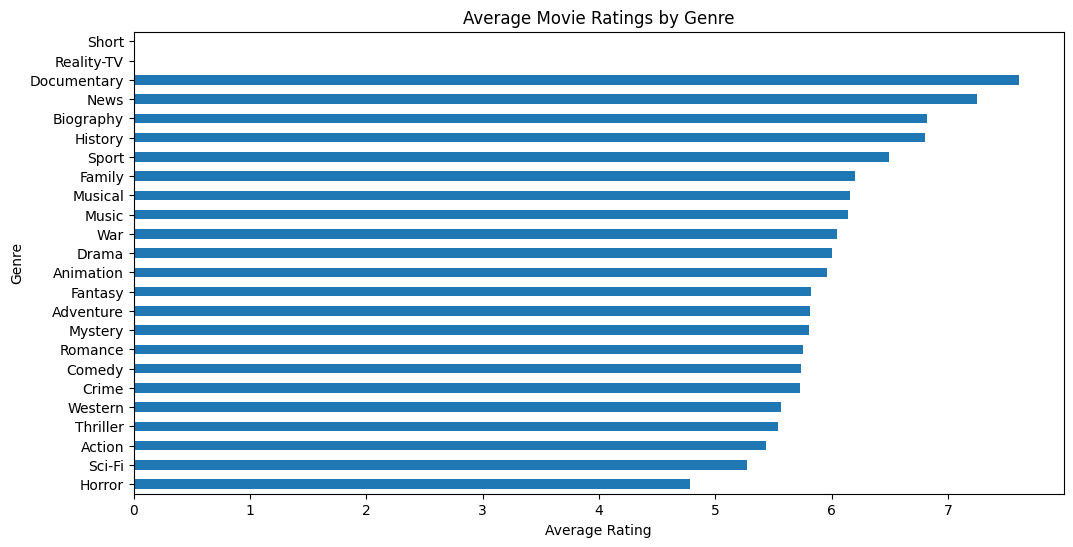

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'movies/IMDb Movies India.csv'
ratings = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert 'Rating' to numeric
ratings['Rating'] = pd.to_numeric(ratings['Rating'], errors='coerce')

# Splitting the genres and exploding them into separate rows
ratings['Genre'] = ratings['Genre'].str.split(', ')
exploded_genres = ratings.explode('Genre')

# Calculating average rating per genre
average_ratings_per_genre = exploded_genres.groupby('Genre')['Rating'].mean()

# Plotting the results
plt.figure(figsize=(12, 6))
average_ratings_per_genre.sort_values().plot(kind='barh')
plt.title('Average Movie Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


# Distribution of Movie Durations

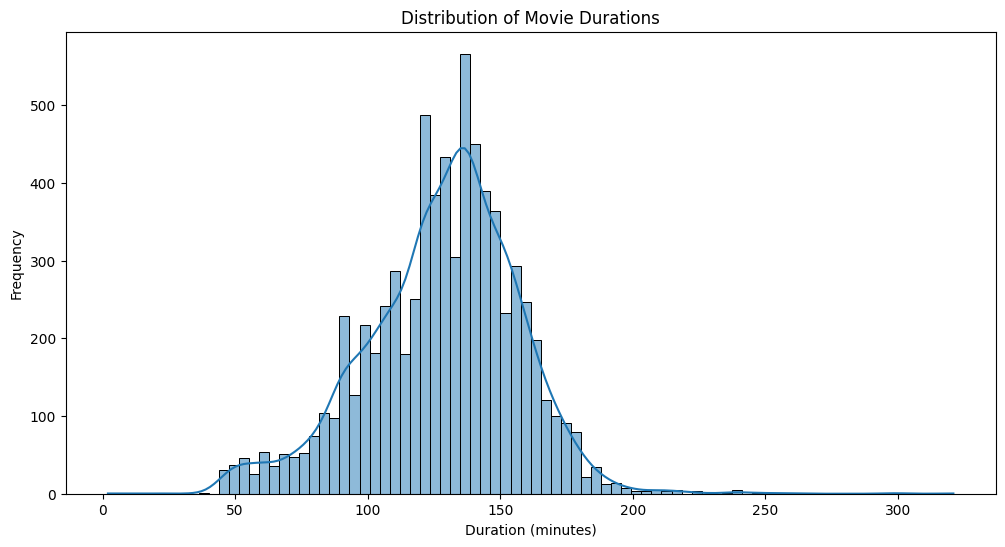

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'movies/IMDb Movies India.csv'
ratings = pd.read_csv(file_path, encoding='ISO-8859-1')

# Extracting numeric value from Duration
ratings['Duration'] = ratings['Duration'].str.extract('(\d+)').astype(float)

# Plotting the distribution of movie durations
plt.figure(figsize=(12, 6))
sns.histplot(ratings['Duration'].dropna(), kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


# Top Directors by Average Movie Rating

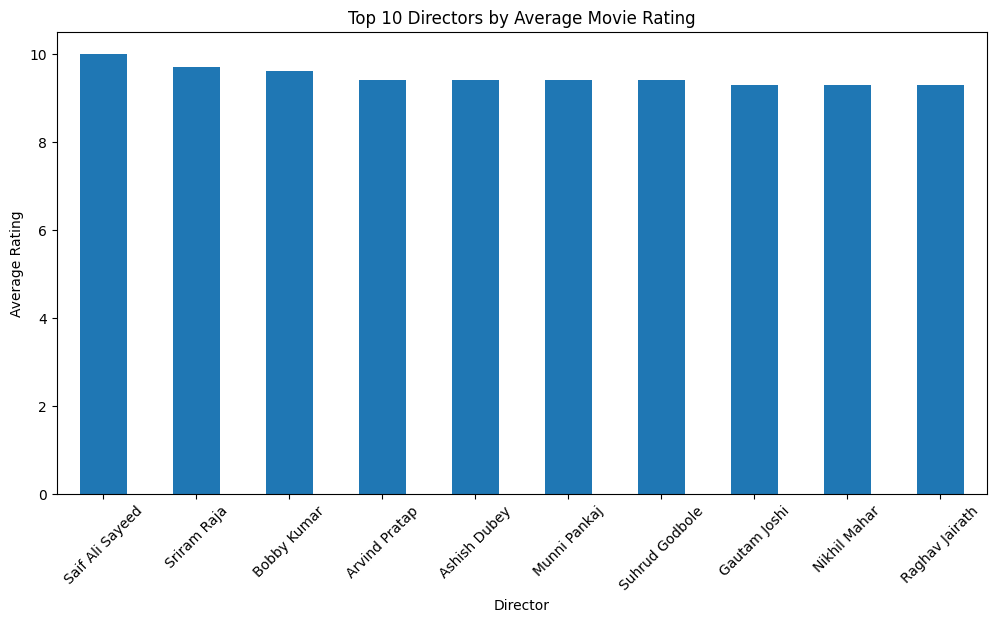

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'movies/IMDb Movies India.csv'
ratings = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert 'Rating' to numeric
ratings['Rating'] = pd.to_numeric(ratings['Rating'], errors='coerce')

# Calculating average rating per director
top_directors = ratings.groupby('Director')['Rating'].mean().nlargest(10)

# Plotting the results
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar')
plt.title('Top 10 Directors by Average Movie Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


# Year-wise Movie Count

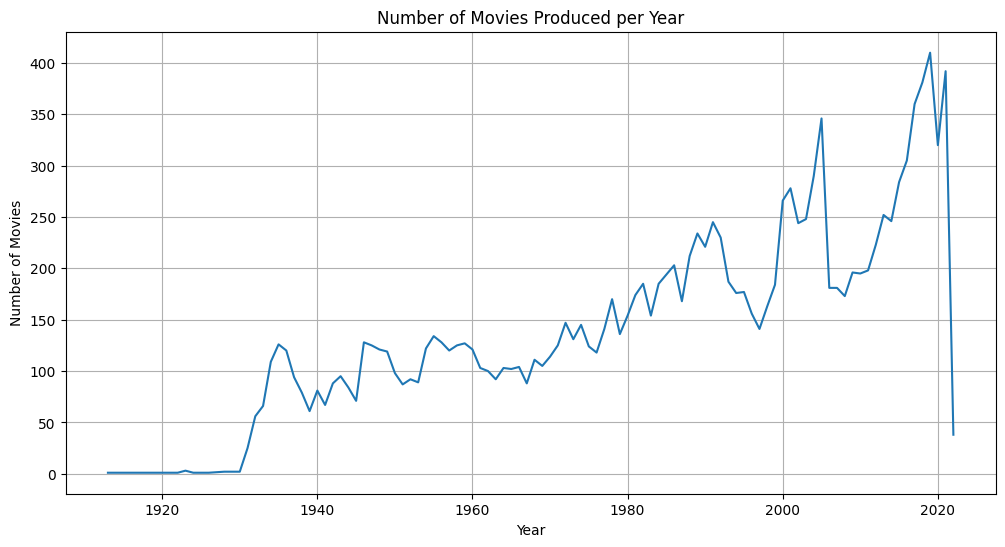

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'movies/IMDb Movies India.csv'
ratings = pd.read_csv(file_path, encoding='ISO-8859-1')

# Cleaning and converting the 'Year' column
ratings['Year'] = ratings['Year'].str.extract('(\d+)').astype(float)

# Counting movies per year
movies_per_year = ratings.groupby('Year').size()

# Plotting the results
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line')
plt.title('Number of Movies Produced per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


# Data Preprocessing

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
file_path = 'movies/IMDb Movies India.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Drop rows with missing rating
data = data.dropna(subset=['Rating'])

# Convert 'Rating' to numeric
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Selecting columns for One-Hot Encoding - 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_cols])

# Creating a new DataFrame with encoded features
encoded_columns = encoder.get_feature_names_out(categorical_cols)
encoded_data = pd.DataFrame(encoded_features, columns=encoded_columns)

# Concatenate the encoded features with the original dataset
data.reset_index(drop=True, inplace=True)
data_encoded = pd.concat([data, encoded_data], axis=1)

# Drop original categorical columns
data_encoded.drop(categorical_cols, axis=1, inplace=True)

# Print the first few rows of the preprocessed data
print(data_encoded.head())


                                 Name    Year Duration  Rating  Votes  \
0  #Gadhvi (He thought he was Gandhi)  (2019)  109 min     7.0      8   
1                             #Yaaram  (2019)  110 min     4.4     35   
2                ...Aur Pyaar Ho Gaya  (1997)  147 min     4.7    827   
3                           ...Yahaan  (2005)  142 min     7.4  1,086   
4                  ?: A Question Mark  (2012)   82 min     5.6    326   

   Genre_Action  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
0           0.0                      0.0                                 0.0   
1           0.0                      0.0                                 0.0   
2           0.0                      0.0                                 0.0   
3           0.0                      0.0                                 0.0   
4           0.0                      0.0                                 0.0   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  ...  \
0    

# Model Training

In [ ]:
import pandas as pd

# Assuming 'data_encoded' is your preprocessed DataFrame
# Check for non-numeric columns
non_numeric_columns = data_encoded.select_dtypes(exclude=['int', 'float']).columns
print("Non-numeric columns:", non_numeric_columns)

# If there are non-numeric columns, decide to either encode or drop them
# For example, let's drop these columns for now
data_encoded = data_encoded.drop(columns=non_numeric_columns)

# Continue with model training
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data_encoded.drop('Rating', axis=1)
y = data_encoded['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Non-numeric columns: Index(['Name', 'Year', 'Duration', 'Votes'], dtype='object')


# Visualize the Distribution of Ratings

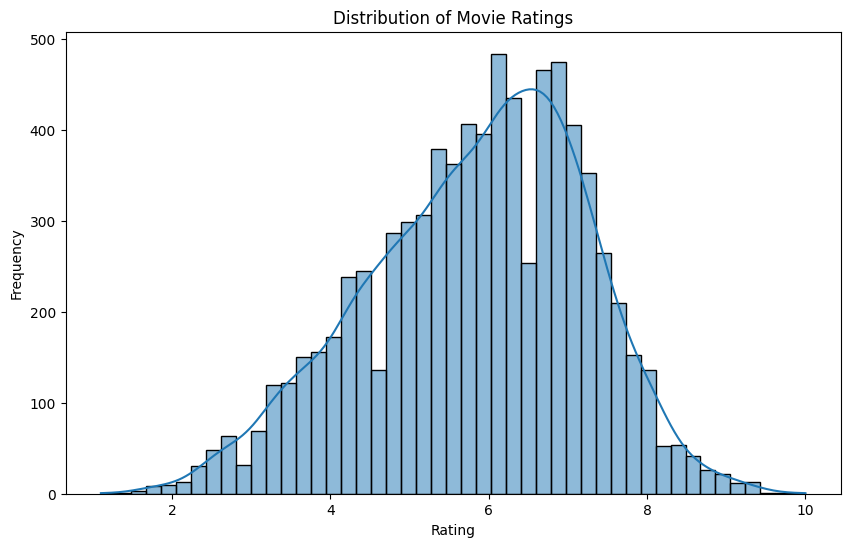

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = 'movies/IMDb Movies India.csv'  # Update this to the path of your dataset
data = pd.read_csv(file_path, encoding='ISO-8859-1')  # Use appropriate encoding

# Now you can plot the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

